In [1]:
import pandas as pd
import numpy as np

These notebook cleans data from the 'raw' subfolder and produces 20 csv files (13 dyad level and 7 node level)
Data cleaning steps:
   > - a. Renaming the exporter and importer columns
   > - b. Removing self loops
   > - c. Removing duplicate rows and keeping the first instance only
   > - d. Keeping only the necessary columns
   > - e. Keeping only the countries common in all datassets
   > - f. Sorting values by country pair and time period
   > - g. Reseting index
   > - h. Saving the data in the cleanind folder

### GHGFP: Emissions embodied in bilateral trade

In [518]:
co2 = pd.read_csv('../data/raw/DF_TRADE.csv')

In [519]:
co2.head()

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,TIME_PERIOD,MEASURE,EXPORTER,IMPORTER,ACTIVITY,PRODUCT_CATEGORY,UNIT_MEASURE,UNIT_MULT,OBS_VALUE
0,DATAFLOW,OECD.STI.PIE:DSD_ICIO_GHG_TRADE@DF_ICIO_GHG_TR...,R,A,1995,TRADE_GHG,ARG,ARG,A01_02,FNL,T_CO2E,6,0.0
1,DATAFLOW,OECD.STI.PIE:DSD_ICIO_GHG_TRADE@DF_ICIO_GHG_TR...,R,A,1996,TRADE_GHG,ARG,ARG,A01_02,FNL,T_CO2E,6,0.0
2,DATAFLOW,OECD.STI.PIE:DSD_ICIO_GHG_TRADE@DF_ICIO_GHG_TR...,R,A,1997,TRADE_GHG,ARG,ARG,A01_02,FNL,T_CO2E,6,0.0
3,DATAFLOW,OECD.STI.PIE:DSD_ICIO_GHG_TRADE@DF_ICIO_GHG_TR...,R,A,1998,TRADE_GHG,ARG,ARG,A01_02,FNL,T_CO2E,6,0.0
4,DATAFLOW,OECD.STI.PIE:DSD_ICIO_GHG_TRADE@DF_ICIO_GHG_TR...,R,A,1999,TRADE_GHG,ARG,ARG,A01_02,FNL,T_CO2E,6,0.0


In [520]:
co2['TIME_PERIOD'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)

In [521]:
co2.shape

(22145760, 13)

In [522]:
co2 = co2[co2['EXPORTER'] != co2['IMPORTER']]

In [523]:
co2 = co2.rename(columns = {'EXPORTER': 'iso_o'})
co2 = co2.rename(columns = {'IMPORTER': 'iso_d'})

In [524]:
co2['ACTIVITY'].unique()

array(['A01_02', 'A03', 'B05_06', 'B07_08', 'B09', 'C10T12', 'C13T15',
       'C16', 'C17_18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25',
       'C26', 'C27', 'C28', 'C29', 'C30', 'C31T33', 'D', 'E', 'F', 'G',
       'H49', 'H50', 'H51', 'H52', 'H53', 'I', 'J58T60', 'J61', 'J62_63',
       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', '_T', 'A', 'B',
       'C', 'C16T18', 'C19T23', 'C20_21', 'C24_25', 'C26_27', 'C29_30',
       'D_E', 'GTN', 'GTI', 'H', 'J', 'M_N', 'OTT', 'OTQ', 'RTT', 'R_S',
       'BTE', 'GTT', 'JTN', 'FTT', 'INFO'], dtype=object)

In [525]:
co2['ACTIVITY'].nunique()

70

In [526]:
co2['PRODUCT_CATEGORY'].unique()

array(['FNL', 'TTL'], dtype=object)

In [527]:
co2[(co2['iso_o'] == 'BGD') & (co2['iso_d'] == 'IND') & (co2['TIME_PERIOD'] == 1995) & (co2['ACTIVITY'] == '_T') & (co2['PRODUCT_CATEGORY'] == 'TTL')]

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,TIME_PERIOD,MEASURE,iso_o,iso_d,ACTIVITY,PRODUCT_CATEGORY,UNIT_MEASURE,UNIT_MULT,OBS_VALUE
18256160,DATAFLOW,OECD.STI.PIE:DSD_ICIO_GHG_TRADE@DF_ICIO_GHG_TR...,R,A,1995,TRADE_GHG,BGD,IND,_T,TTL,T_CO2E,6,0.152


Product category `TTL` contains both intermediate and final products. 
Activity `_T` is the sum of non-overlapping industry demand. I am keeping these two only.

In [528]:
co2_T = co2[(co2['ACTIVITY'] == '_T') & (co2['PRODUCT_CATEGORY'] == 'TTL')]

In [529]:
co2.shape

(21861840, 13)

In [530]:
co2_T.shape

(156156, 13)

In [531]:
print(co2_T['iso_o'].nunique())
print(co2_T['iso_d'].nunique())
print(co2_T['ACTIVITY'].nunique())
print(co2_T['PRODUCT_CATEGORY'].nunique())
print(co2_T['TIME_PERIOD'].nunique())
print(co2_T.groupby(['iso_o', 'iso_d']).ngroups)

78
78
1
1
26
6006


In [532]:
co2_T['TIME_PERIOD'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)

In [533]:
column = ['iso_o', 'iso_d', 'TIME_PERIOD']
dupli = co2_T.duplicated(subset = column, keep = 'last')

In [534]:
co2_uni = co2_T[~dupli]

In [535]:
co2_uni.shape #There is no duplicate.

(156156, 13)

In [536]:
co2_uni = co2_uni[['iso_o', 'iso_d', 'TIME_PERIOD', 'OBS_VALUE']]

In [537]:
co2_uni = co2_uni.reset_index(drop = True)

In [538]:
co2_uni = co2_uni[co2_uni['iso_o'] != 'W']
co2_uni = co2_uni[co2_uni['iso_d'] != 'W']

In [539]:
co2_uni.shape

(152152, 4)

In [540]:
print(co2_uni['iso_o'].nunique())
print(co2_uni['iso_d'].nunique())
print(co2_uni['TIME_PERIOD'].nunique())
print(co2_uni.groupby(['iso_o', 'iso_d']).ngroups)

77
77
26
5852


In [541]:
assert set(co2_uni['iso_o'].unique()) == set(co2_uni['iso_d'].unique()) #Exporters and importers have same set of countries.

In [542]:
countries = set(co2_uni['iso_o'].unique())

In [543]:
len(countries)

77

### Calculating Net Import of CO2 

In [544]:
co2_uni.head(29)

,iso_o,iso_d,TIME_PERIOD,OBS_VALUE
0,AUS,ARG,1995,0.165
1,AUS,ARG,1996,0.187
2,AUS,ARG,1997,0.244
3,AUS,ARG,1998,0.432
4,AUS,ARG,1999,0.526
5,AUS,ARG,2000,0.393
6,AUS,ARG,2001,0.474
7,AUS,ARG,2002,0.282
8,AUS,ARG,2003,0.363
9,AUS,ARG,2004,0.156


In [545]:
co2_export = co2_uni.groupby(['iso_o', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()

In [546]:
# sanity check
#co2_export[co2_export['iso_o'] == 'BGD']

In [547]:
print(co2_uni.shape)
print(co2_export.shape)
print(co2_uni['iso_o'].nunique())
print(co2_export['iso_o'].nunique())

(152152, 4)
(2002, 3)
77
77


In [548]:
co2_import = co2_uni.copy()

In [549]:
co2_import = co2_import.groupby(['iso_d', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()

In [550]:
co2_import.head(3)

,iso_d,TIME_PERIOD,OBS_VALUE
0,ARG,1995,32.687
1,ARG,1996,37.105
2,ARG,1997,44.514


In [551]:
co2_export.head(3)

,iso_o,TIME_PERIOD,OBS_VALUE
0,ARG,1995,42.976
1,ARG,1996,45.263
2,ARG,1997,46.402


In [552]:
co2_export[(co2_export['iso_o'] == 'ARG') & (co2_export['TIME_PERIOD'] == 2000)]

,iso_o,TIME_PERIOD,OBS_VALUE
5,ARG,2000,48.636


In [553]:
co2_import[(co2_import['iso_d'] == 'ARG') & (co2_import['TIME_PERIOD'] == 2000)]

,iso_d,TIME_PERIOD,OBS_VALUE
5,ARG,2000,44.666


In [554]:
co2_import[(co2_import['iso_d'] == 'ARG') & (co2_import['TIME_PERIOD'] == 2000)]

,iso_d,TIME_PERIOD,OBS_VALUE
5,ARG,2000,44.666


In [555]:
co2_import = co2_import.rename(columns = {'iso_d': 'iso_o'})
co2_import = co2_import.rename(columns = {'OBS_VALUE': 'import'})
co2_export = co2_export.rename(columns = {'OBS_VALUE': 'export'})
nx = co2_export.merge(co2_import, on = ['iso_o', 'TIME_PERIOD'], how = 'left')
nx['net_imp'] = nx['import'] - nx['export'] 

In [556]:
nx.head(30)

,iso_o,TIME_PERIOD,export,import,net_imp
0,ARG,1995,42.976,32.687,-10.289
1,ARG,1996,45.263,37.105,-8.158
2,ARG,1997,46.402,44.514,-1.888
3,ARG,1998,47.581,51.169,3.588
4,ARG,1999,46.040,47.869,1.829
5,ARG,2000,48.636,44.666,-3.970
6,ARG,2001,50.728,38.006,-12.722
7,ARG,2002,87.260,17.889,-69.371
8,ARG,2003,81.623,23.903,-57.720
9,ARG,2004,83.397,33.429,-49.968


In [557]:
# sanity check
nx[nx['iso_o'] == 'USA']

,iso_o,TIME_PERIOD,export,import,net_imp
1898,USA,1995,802.998,1186.704,383.706
1899,USA,1996,806.306,1229.659,423.353
1900,USA,1997,857.704,1339.161,481.457
1901,USA,1998,819.841,1506.048,686.207
1902,USA,1999,826.156,1635.501,809.345
1903,USA,2000,883.248,1836.134,952.886
1904,USA,2001,797.040,1716.290,919.250
1905,USA,2002,707.038,1695.000,987.962
1906,USA,2003,678.301,1741.613,1063.312
1907,USA,2004,727.370,1929.696,1202.326


### CO2 edgelist for SNA

In [558]:
edgelist_co2 = co2_uni.pivot_table(index = ['iso_o', 'iso_d'], columns = 'TIME_PERIOD', values = 'OBS_VALUE', fill_value = 0).reset_index()

In [559]:
assert co2_uni.groupby(['iso_o', 'iso_d']).ngroups == edgelist_co2 .shape[0] 

### Dragging continent from CEPII country level data

In [560]:
node = pd.read_csv('../data/raw/geo_cepii.csv', encoding='latin1')

In [561]:
node.shape

(238, 34)

In [562]:
# renaming the exporter column name to match it with the dyad level fixed variable data
node = node.rename(columns = {'iso3': 'iso_o'})

In [563]:
node = node[['iso_o', 'country', 'continent']]

In [564]:
# removing duplicates
equivalent_columns = ['iso_o', 'country', 'continent']
duplicates = node.duplicated(subset = equivalent_columns, keep = 'last')
print(node[duplicates].shape)
#print(node[duplicates])

(13, 3)


In [565]:
node[duplicates]

,iso_o,country,continent
11,AUS,Australia,Pacific
23,BEN,Benin,Africa
27,BOL,Bolivia,America
29,BRA,Brazil,America
36,CAN,Canada,America
42,CIV,Côte d'Ivoire,Africa
55,DEU,Germany,Europe
117,KAZ,Kazakstan,Asia
153,NGA,Nigeria,Africa
211,TUR,Turkey,Europe


In [566]:
node_unique = node[~duplicates]
node_unique.shape

(225, 3)

In [567]:
node_unique[node_unique['iso_o'] == 'ZAF']

,iso_o,country,continent
234,ZAF,South Africa,Africa


In [568]:
node_unique['iso_o'].nunique()

225

### IMF

In [569]:
imf = pd.read_excel("../data/raw/IMF_classification.xlsx")

In [570]:
imf["development"] = 0

In [571]:
imf.loc[imf['category'] == 'Advanced Economies', 'development'] = 1

In [572]:
print(imf['category'].value_counts())
print(imf['development'].value_counts())

category
Emerging and Developing Economies    155
Advanced Economies                    41
Name: count, dtype: int64
development
0    155
1     41
Name: count, dtype: int64


In [573]:
imf

,country,category,development
0,Andorra,Advanced Economies,1
1,Australia,Advanced Economies,1
2,Austria,Advanced Economies,1
3,Belgium,Advanced Economies,1
4,Canada,Advanced Economies,1
...,...,...,...
191,Vietnam,Emerging and Developing Economies,0
192,West Bank and Gaza,Emerging and Developing Economies,0
193,Yemen,Emerging and Developing Economies,0
194,Zambia,Emerging and Developing Economies,0


In [574]:
q = set(imf['country'].unique()) - set(node_unique['country'].unique())

In [575]:
len(q)

36

In [576]:
q

{'Belgium',
 'Cabo Verde',
 'Democratic Republic of the Congo',
 'Eswatini',
 'Hong Kong SAR',
 'Kazakhstan',
 'Kosovo',
 'Kyrgyz Republic',
 'Lao P.D.R.',
 'Libya',
 'Macao SAR',
 'Micronesia',
 'Moldova',
 'Montenegro',
 'Myanmar',
 'North Macedonia',
 'Republic of Congo',
 'Russia',
 'Serbia',
 'Slovak Republic',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Syria',
 'São Tomé and Príncipe',
 'Taiwan Province of China',
 'Tanzania',
 'The Bahamas',
 'The Gambia',
 'The Netherlands',
 'Timor-Leste',
 'Türkiye',
 'United States',
 'Vietnam',
 'West Bank and Gaza'}

In [577]:
node_unique.loc[node_unique['country'] == 'Bahamas', 'country'] = 'The Bahamas'
node_unique.loc[node_unique['country'] == 'Belgium and Luxembourg', 'country'] = 'Belgium'
node_unique.loc[node_unique['country'] ==  'Burma', 'country'] = 'Myanmar'
node_unique.loc[node_unique['country'] ==  'Cape Verde', 'country'] = 'Cabo Verde'
node_unique.loc[node_unique['country'] ==  'East Timor', 'country'] =  'Timor-Leste'
node_unique.loc[node_unique['country'] ==  'Gambia', 'country'] =  'The Gambia'
node_unique.loc[node_unique['country'] == 'Hong Kong', 'country'] = 'Hong Kong SAR'
node_unique.loc[node_unique['country'] == 'Kazakstan', 'country'] = 'Kazakhstan'
node_unique.loc[node_unique['country'] == "Korea, Dem. People's Rep. of", 'country'] = "Korea"
node_unique.loc[node_unique['country'] =='Kyrgyzstan', 'country'] = 'Kyrgyz Republic'
node_unique.loc[node_unique['country'] == "Lao People's Democratic Republic", 'country'] =  'Lao P.D.R.'
node_unique.loc[node_unique['country'] == 'Libyan Arab Jamahiriya', 'country'] = 'Libya'
node_unique.loc[node_unique['country'] == 'Macau (Aomen)', 'country'] = 'Macao SAR'
node_unique.loc[node_unique['country'] == 'Macedonia (the former Yugoslav Rep. of)', 'country'] = 'North Macedonia'
node_unique.loc[node_unique['country'] == 'Micronesia (Federated States of)', 'country'] = 'Micronesia'
node_unique.loc[node_unique['country'] == 'Moldova, Rep.of', 'country'] = 'Moldova'
node_unique.loc[node_unique['country'] == 'Netherlands', 'country'] = 'The Netherlands'
node_unique.loc[node_unique['country'] == 'Palestine', 'country'] = 'West Bank and Gaza'
node_unique.loc[node_unique['country'] == 'Russian Federation', 'country'] = 'Russia'
node_unique.loc[node_unique['country'] == 'Saint Kitts and Nevis', 'country'] = 'St. Kitts and Nevis'
node_unique.loc[node_unique['country'] == 'Saint Lucia', 'country'] = 'St. Lucia'
node_unique.loc[node_unique['country'] == 'Saint Vincent and the Grenadines', 'country'] = 'St. Vincent and the Grenadines'
node_unique.loc[node_unique['country'] == 'Sao Tome and Principe', 'country'] = 'São Tomé and Príncipe'
node_unique.loc[node_unique['country'] == 'Serbia and Montenegro', 'country'] = 'Serbia'
node_unique.loc[node_unique['country'] == 'Slovakia', 'country'] = 'Slovak Republic'
node_unique.loc[node_unique['country'] == 'Swaziland', 'country'] = 'Eswatini'
node_unique.loc[node_unique['country'] == 'Syrian Arab Republic', 'country'] =  'Syria'
node_unique.loc[node_unique['country'] ==  'Taiwan', 'country'] =   'Taiwan Province of China'
node_unique.loc[node_unique['country'] ==  'Tanzania, United Rep. of ', 'country'] =  'Tanzania'
node_unique.loc[node_unique['country'] ==  'Turkey', 'country'] =  'Türkiye'
node_unique.loc[node_unique['country'] ==  'United States of America', 'country'] =  'United States'
node_unique.loc[node_unique['country'] ==  'Viet Nam', 'country'] =  'Vietnam'
node_unique.loc[node_unique['country'] ==  'Congo', 'country'] =  'Republic of Congo'
node_unique.loc[node_unique['country'] ==  'Congo (Democratic Republic of the)', 'country'] =  'Democratic Republic of the Congo'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\3250930496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_unique.loc[node_unique['country'] == 'Bahamas', 'country'] = 'The Bahamas'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\3250930496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_unique.loc[node_unique['country'] == 'Belgium and Luxembourg', 'country'] = 'Belgium'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\3250930496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [578]:
nodeUnique_imf = node_unique.merge(imf, on = 'country', how='left')

In [579]:
nodeUnique_imf = nodeUnique_imf[nodeUnique_imf['iso_o'].isin(countries)]

In [580]:
print(imf['country'].nunique())
print(node_unique['country'].nunique())
print(nodeUnique_imf['country'].nunique())

196
224
75


In [581]:
nodeUnique_imf['category'].value_counts()

category
Emerging and Developing Economies    38
Advanced Economies                   37
Name: count, dtype: int64

In [582]:
nodeUnique_imf['category'].isna().sum()

0

In [583]:
nodeUnique_imf[nodeUnique_imf['category'].isna()]

,iso_o,country,continent,category,development


In [584]:
print(nodeUnique_imf['country'].nunique())

75


In [585]:
print(co2_uni['iso_o'].nunique())
print(co2_uni['iso_d'].nunique())
print(edgelist_co2['iso_o'].nunique())
print(edgelist_co2['iso_d'].nunique())

77
77
77
77


In [586]:
set(co2_uni['iso_o'].unique()) - set(nodeUnique_imf['iso_o'].unique())

{'ROU', 'WXD'}

In [587]:
co2_uni[co2_uni['iso_o'] == 'WXD']

,iso_o,iso_d,TIME_PERIOD,OBS_VALUE
1950,WXD,ARG,1995,4.017
1951,WXD,ARG,1996,4.832
1952,WXD,ARG,1997,5.277
1953,WXD,ARG,1998,6.706
1954,WXD,ARG,1999,5.302
...,...,...,...,...
152121,WXD,ZAF,2016,11.112
152122,WXD,ZAF,2017,10.813
152123,WXD,ZAF,2018,13.556
152124,WXD,ZAF,2019,14.237


In [588]:
nodeUnique_imf[nodeUnique_imf['iso_o'] == 'ROU']

,iso_o,country,continent,category,development


In [589]:
Romania = ['ROU', 'Romania', 'Europe', 'Emerging and Developing Economies', 0]
nodeUnique_imf.loc[len(nodeUnique_imf)] = Romania

In [590]:
nodeUnique_imf['continent'].value_counts()

continent
Europe     34
Asia       23
America     9
Africa      8
Pacific     2
Name: count, dtype: int64

In [591]:
nodeUnique_imf['iso_o'].nunique()

76

In [592]:
nodeUnique_imf.head()

,iso_o,country,continent,category,development
9,ARG,Argentina,America,Emerging and Developing Economies,0.0
10,AUT,Austria,Europe,Advanced Economies,1.0
11,AUS,Australia,Pacific,Advanced Economies,1.0
16,BGD,Bangladesh,Asia,Emerging and Developing Economies,0.0
17,BEL,Belgium,Europe,Advanced Economies,1.0


# Time Varying Data

In [593]:
#eci = pd.read_csv('../data/raw/Data-ECI-Trade.csv')
#eci = eci.drop(columns = ['1998', '1999', '2021', '2022', '2023'])

### Manufacturing 

In [594]:
manu = pd.read_csv('../data/raw/08991918-fd28-4b39-9ab5-47a2294938ed_Data.csv')

In [595]:
manu.head(2)

,Series Name,Series Code,Country Name,Country Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,13.7791892429929,12.4860851363953,11.4998672561905,11.477587555803,11.4200060049012,4.1141966128347,3.53042246146676,6.16017721650239,7.04318108092508,7.52811462924912
1,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,Albania,ALB,5.7792679641904,5.55414354336552,5.18301860252376,5.13168815921025,5.0656135578178,4.7114591532226,...,6.19222242619904,5.37937812993245,5.74765422818215,5.90710171744016,6.2759154301457,6.30340554104145,6.51640113307682,6.70811506475057,6.9674858625345,7.06941394147026


In [596]:
manu = manu.iloc[:265, :]
manu = manu.rename(columns = {'Country Code': 'iso_o'})
manu.columns = manu.columns.str.replace(r' \[YR\d+\]', '', regex=True)
manu.columns.values[4:] = pd.to_numeric(manu.columns[4:], errors='coerce').astype('Int64')
manu = manu.drop(columns= ['Country Name', 'Series Name', 'Series Code'])

In [597]:
manu.dtypes

iso_o    object
1995     object
1996     object
1997     object
1998     object
1999     object
2000     object
2001     object
2002     object
2003     object
2004     object
2005     object
2006     object
2007     object
2008     object
2009     object
2010     object
2011     object
2012     object
2013     object
2014     object
2015     object
2016     object
2017     object
2018     object
2019     object
2020     object
dtype: object

In [598]:
manu.iloc[:, 1:] = manu.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [599]:
year = list(range(1995, 2021))
manu[year] = manu[year].replace('..', np.nan)
manu[year] = manu[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)
manu = manu[manu['iso_o'].isin(countries)]
manu = manu.reset_index(drop = True)

In [600]:
manu.isna().sum()

iso_o     0
1995     10
1996     10
1997      8
1998      8
1999      7
2000      5
2001      5
2002      4
2003      4
2004      3
2005      2
2006      2
2007      2
2008      2
2009      2
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
2016      1
2017      1
2018      1
2019      1
2020      1
dtype: int64

In [601]:
manu[year] = manu[year].fillna(manu[year].mean())

In [602]:
manu_long = manu.set_index('iso_o').stack().reset_index()

In [603]:
manu_long.head(2)

,iso_o,level_1,0
0,ARG,1995,17.25
1,ARG,1996,17.54


In [604]:
manu_long = manu_long.rename(columns= {'level_1': 'TIME_PERIOD'})
manu_long = manu_long.rename(columns= {0: 'manufacturing'})

In [605]:
assert manu_long['iso_o'].nunique() == manu['iso_o'].nunique()

In [606]:
manu_long[manu_long['TIME_PERIOD'] == 2020].isna().sum()

iso_o            0
TIME_PERIOD      0
manufacturing    0
dtype: int64

## CO2

In [607]:
co2 = pd.read_csv('../data/raw/ed44d45b-73bc-40c4-af99-2737916812f9_Data.csv')

In [608]:
co2.head(2)

,Series Name,Series Code,Country Name,Country Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,Afghanistan,AFG,0.0857268287354924,0.0797826255599618,0.0750375662032016,0.0741336271677719,0.0691630566199303,0.0504760801948225,...,0.388742453073337,0.319626607745266,0.262469648389334,0.238642815009995,0.246706024551365,0.216929891611134,0.226011227289355,0.215877625146902,0.191490829184533,0.18055501271226
1,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,Albania,ALB,0.649353908545874,0.648635920143509,0.502019991226959,0.612012670487417,0.992866007157796,1.04644601682018,...,1.71699317945955,1.56285286069064,1.64737424579253,1.76379943401137,1.68830316766428,1.57515330650766,1.85891071277559,1.85097837827277,1.73551805047385,1.60713272623032


In [609]:
co2 = co2.iloc[:265, :]
co2 = co2.rename(columns = {'Country Code': 'iso_o'})
co2.columns = co2.columns.str.replace(r' \[YR\d+\]', '', regex=True)
co2.columns.values[4:] = pd.to_numeric(co2.columns[4:], errors='coerce').astype('Int64')
co2 = co2.drop(columns= ['Country Name', 'Series Name', 'Series Code'])

In [610]:
co2.iloc[:, 1:] = co2.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
co2[year] = co2[year].replace('..', np.nan)
co2[year] = co2[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)
co2 = co2[co2['iso_o'].isin(countries)]
co2 = co2.reset_index(drop = True)

In [611]:
co2.isna().sum()

iso_o    0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
dtype: int64

In [612]:
co2[year] = co2[year].fillna(co2[year].mean())
co2_long = co2.set_index('iso_o').stack().reset_index()

In [613]:
co2_long = co2_long.rename(columns= {'level_1': 'TIME_PERIOD'})
co2_long = co2_long.rename(columns= {0: 'co2'})

In [614]:
assert manu_long['iso_o'].nunique() == manu['iso_o'].nunique() == co2_long['iso_o'].nunique() == co2['iso_o'].nunique()

### Urban

In [615]:
urban = pd.read_csv('../data/raw/42356cfe-6c7d-4cdf-b625-ed4d46e31a8a_Data.csv')

In [616]:
urban.head(2)

,Series Name,Series Code,Country Name,Country Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Urban population (% of total population),SP.URB.TOTL.IN.ZS,Afghanistan,AFG,21.624,21.714,21.805,21.895,21.986,22.078,...,23.948,24.16,24.373,24.587,24.803,25.02,25.25,25.495,25.754,26.026
1,Urban population (% of total population),SP.URB.TOTL.IN.ZS,Albania,ALB,38.911,39.473,40.035,40.601,41.169,41.741,...,53.247,54.33,55.387,56.423,57.434,58.421,59.383,60.319,61.229,62.112


In [617]:
urban = urban.iloc[:265, :]
urban = urban.rename(columns = {'Country Code': 'iso_o'})
urban.columns = urban.columns.str.replace(r' \[YR\d+\]', '', regex=True)
urban.columns.values[4:] = pd.to_numeric(urban.columns[4:], errors='coerce').astype('Int64')
urban = urban.drop(columns= ['Country Name', 'Series Name', 'Series Code'])

In [618]:
urban.iloc[:, 1:] = urban.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
urban[year] = urban[year].replace('..', np.nan)
urban[year] = urban[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)
urban = urban[urban['iso_o'].isin(countries)]
urban = urban.reset_index(drop = True)

In [619]:
urban.dtypes

iso_o     object
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
dtype: object

In [620]:
urban.isna().sum()

iso_o    0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
dtype: int64

In [621]:
#urban[year] = urban[year].fillna(co2[year].mean())
urban_long = urban.set_index('iso_o').stack().reset_index()

In [622]:
urban_long = urban_long.rename(columns= {'level_1': 'TIME_PERIOD'})
urban_long = urban_long.rename(columns= {0: 'urban'})

In [623]:
assert manu_long['iso_o'].nunique() == manu['iso_o'].nunique() == urban_long['iso_o'].nunique() == urban['iso_o'].nunique()

# Internet penetration

In [624]:
internet = pd.read_csv('../data/raw/ef199ab8-5622-479a-ac78-3c81678fe8db_Data.csv')

In [625]:
internet.head(2)

,Series Name,Series Code,Country Name,Country Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Individuals using the Internet (% of population),IT.NET.USER.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,5,5.45455,5.9,7,8.26,11,13.5,16.8,17.6,17.0485
1,Individuals using the Internet (% of population),IT.NET.USER.ZS,Albania,ALB,0.0112,0.0322,0.0486,0.065,0.0814,0.114097,...,47,49.4,51.8,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377


In [626]:
internet = internet.iloc[:265, :]
internet = internet.rename(columns = {'Country Code': 'iso_o'})
internet.columns = internet.columns.str.replace(r' \[YR\d+\]', '', regex=True)
internet.columns.values[4:] = pd.to_numeric(internet.columns[4:], errors='coerce').astype('Int64')
internet = internet.drop(columns= ['Country Name', 'Series Name', 'Series Code'])

In [627]:
internet.iloc[:, 1:] = internet.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
internet[year] = internet[year].replace('..', np.nan)
internet[year] = internet[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)
internet = internet[internet['iso_o'].isin(countries)]
internet = internet.reset_index(drop = True)

In [628]:
internet.isna().sum()

iso_o    0
1995     9
1996     5
1997     2
1998     1
1999     0
2000     2
2001     0
2002     1
2003     2
2004     2
2005     1
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     1
2019     0
2020     0
dtype: int64

In [629]:
internet[year] = internet[year].fillna(co2[year].mean())
internet_long = internet.set_index('iso_o').stack().reset_index()

In [630]:
internet_long = internet_long.rename(columns= {'level_1': 'TIME_PERIOD'})
internet_long = internet_long.rename(columns= {0: 'internet'})

In [631]:
assert manu_long['iso_o'].nunique() == manu['iso_o'].nunique() == internet_long['iso_o'].nunique() == internet['iso_o'].nunique()

### GDP per capita

In [632]:
gdp_pct = pd.read_csv('../data/raw/3b393571-3769-446b-8a79-c591be497b98_Data.csv')

In [633]:
gdp_pct = gdp_pct.iloc[:265, :]
gdp_pct = gdp_pct.rename(columns = {'Country Code': 'iso_o'})
gdp_pct.columns = gdp_pct.columns.str.replace(r' \[YR\d+\]', '', regex=True)
gdp_pct.columns.values[4:] = pd.to_numeric(gdp_pct.columns[4:], errors='coerce').astype('Int64')
gdp_pct = gdp_pct.drop(columns= ['Country Name', 'Series Name', 'Series Code'])

In [634]:
gdp_pct = gdp_pct[gdp_pct['iso_o'].isin(countries)]
gdp_pct = gdp_pct.reset_index(drop = True)

In [635]:
gdp_pct[year] = gdp_pct[year].replace('..', np.nan)
gdp_pct[year] = gdp_pct[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)

In [636]:
gdp_pct.dtypes

iso_o     object
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
dtype: object

In [637]:
gdp_pct.isna().sum()

iso_o    0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
dtype: int64

In [638]:
gdp_pct_long = gdp_pct.set_index('iso_o').stack().reset_index()

In [639]:
gdp_pct_long.head(3)

,iso_o,level_1,0
0,ARG,1995,9934.11
1,ARG,1996,10352.14
2,ARG,1997,11056.69


In [640]:
gdp_pct_long = gdp_pct_long.rename(columns= {'level_1': 'TIME_PERIOD'})
gdp_pct_long = gdp_pct_long.rename(columns= {0: 'gdp_pct'})

In [641]:
assert gdp_pct_long['iso_o'].nunique() == gdp_pct_long['iso_o'].nunique()

In [642]:
assert gdp_pct_long['iso_o'].nunique() == gdp_pct_long['iso_o'].nunique() == manu['iso_o'].nunique() == manu_long['iso_o'].nunique()

In [643]:
assert gdp_pct_long['iso_o'].nunique() == gdp_pct_long['iso_o'].nunique() == manu['iso_o'].nunique() == manu_long['iso_o'].nunique()

#### Trade Openness

In [644]:
trade_openness = pd.read_csv("../data/raw/fd0b25fb-ca96-469d-b103-75a1a9737d12_Data.csv")

In [645]:
trade_openness

,Series Name,Series Code,Country Name,Country Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Trade (% of GDP),NE.TRD.GNFS.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,46.7098945514103
1,Trade (% of GDP),NE.TRD.GNFS.ZS,Albania,ALB,40.1386989518314,44.4117820054663,44.7293780649181,47.1306266993222,49.8954184095195,61.6092610436407,...,80.6989985298954,76.9683583166821,75.7506185619748,75.0212023084129,71.2794476606014,74.0144504546815,76.7873817898989,75.6940783717425,75.382128932689,59.5207118897718
2,Trade (% of GDP),NE.TRD.GNFS.ZS,Algeria,DZA,55.1910052081435,53.7051478767794,52.2439115059386,45.0944505585079,50.9291093379713,62.8583436360347,...,62.2200899610479,60.7576393340605,59.151008157244,56.9235419669867,53.2046225904145,49.7609327925216,49.8208161712587,52.4361676779223,46.5068426081672,40.3897565625388
3,Trade (% of GDP),NE.TRD.GNFS.ZS,American Samoa,ASM,..,..,..,..,..,..,...,157.543859649123,176.40625,173.824451410658,174.805598755832,162.407132243685,159.165424739195,161.437908496732,171.830985915493,156.568778979907,154.368932038835
4,Trade (% of GDP),NE.TRD.GNFS.ZS,Andorra,AND,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [646]:
trade_openness = trade_openness.iloc[:265, :]
trade_openness = trade_openness.rename(columns = {'Country Code': 'iso_o'})
trade_openness.columns = trade_openness.columns.str.replace(r' \[YR\d+\]', '', regex=True)
trade_openness.columns.values[4:] = pd.to_numeric(trade_openness.columns[4:], errors='coerce').astype('Int64')
trade_openness = trade_openness.drop(columns= ['Country Name', 'Series Name', 'Series Code'])
trade_openness = trade_openness[trade_openness['iso_o'].isin(countries)]
trade_openness = trade_openness.reset_index(drop = True)
trade_openness[year] = trade_openness[year].replace('..', np.nan)
trade_openness[year] = trade_openness[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)

In [647]:
trade_openness.isna().sum()

iso_o    0
1995     2
1996     2
1997     2
1998     2
1999     2
2000     2
2001     2
2002     2
2003     2
2004     2
2005     2
2006     2
2007     2
2008     2
2009     2
2010     2
2011     2
2012     2
2013     2
2014     2
2015     2
2016     2
2017     3
2018     3
2019     3
2020     3
dtype: int64

In [648]:
trade_openness[year] = trade_openness[year].fillna(trade_openness[year].mean())
trade_openness_long = trade_openness.set_index('iso_o').stack().reset_index()

In [649]:
trade_openness_long = trade_openness_long.rename(columns= {'level_1': 'TIME_PERIOD'})
trade_openness_long = trade_openness_long.rename(columns= {0: 'trade_openness'})

In [650]:
trade_openness_long.head(3)

,iso_o,TIME_PERIOD,trade_openness
0,ARG,1995,19.77
1,ARG,1996,21.51
2,ARG,1997,23.34


In [651]:
print(trade_openness_long['iso_o'].nunique())
print(trade_openness['iso_o'].nunique())

75
75


In [652]:
assert gdp_pct_long['iso_o'].nunique() == gdp_pct_long['iso_o'].nunique() == manu['iso_o'].nunique() == manu_long['iso_o'].nunique() == trade_openness['iso_o'].nunique() == trade_openness_long['iso_o'].nunique()

### Energy use

In [653]:
energy = pd.read_csv("../data/raw/fe3ba000-c22a-442d-b14a-150b8ebb0d04_Data.csv")

In [654]:
energy = energy.iloc[:265, :]
energy = energy.rename(columns = {'Country Code': 'iso_o'})
energy.columns = energy.columns.str.replace(r' \[YR\d+\]', '', regex=True)
energy.columns.values[4:] = pd.to_numeric(energy.columns[4:], errors='coerce').astype('Int64')
energy = energy.drop(columns= ['Country Name', 'Series Name', 'Series Code'])
energy = energy[energy['iso_o'].isin(countries)]
energy = energy.reset_index(drop = True)
energy[year] = energy[year].replace('..', np.nan)
energy[year] = energy[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)

In [655]:
energy.dtypes

iso_o     object
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
dtype: object

In [656]:
energy.isna().sum()

iso_o    0
1995     1
1996     1
1997     1
1998     1
1999     1
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
dtype: int64

In [657]:
energy[year] = energy[year].fillna(energy[year].mean())

In [658]:
energy_long = energy.set_index('iso_o').stack().reset_index()

In [659]:
energy_long.head(3)

,iso_o,level_1,0
0,ARG,1995,1507.20
1,ARG,1996,1534.09
2,ARG,1997,1567.39


In [660]:
energy_long = energy_long.rename(columns= {'level_1': 'TIME_PERIOD'})
energy_long = energy_long.rename(columns= {0: 'energy'})

In [661]:
assert gdp_pct_long['iso_o'].nunique() == gdp_pct_long['iso_o'].nunique() == manu['iso_o'].nunique() == manu_long['iso_o'].nunique()  == energy['iso_o'].nunique() == energy_long['iso_o'].nunique()

###  renewable

In [662]:
renewable = pd.read_csv("../data/raw/9f252d98-47a9-4552-a76c-c3e9d7b86dd7_Data.csv")

In [663]:
renewable.head(3)

,Series Name,Series Code,Country Name,Country Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Afghanistan,AFG,31.8,33.9,36.4,38,43.4,45,...,12.6,15.4,16.9,19.1,17.7,20.2,19.5,18.3,18.9,18.2
1,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Albania,ALB,50.6,51.6,55.9,49.9,42.6,41.4,...,35.8,39.9,41.1,38.6,38.5,39.4,36.9,37.8,40.1,44.4
2,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Algeria,DZA,0.4,0.4,0.5,0.5,0.5,0.4,...,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.1


In [664]:
renewable = renewable.iloc[:265, :]
renewable = renewable.rename(columns = {'Country Code': 'iso_o'})
renewable.columns = renewable.columns.str.replace(r' \[YR\d+\]', '', regex=True)
renewable.columns.values[4:] = pd.to_numeric(renewable.columns[4:], errors='coerce').astype('Int64')
renewable = renewable.drop(columns= ['Country Name', 'Series Name', 'Series Code'])
renewable = renewable[renewable['iso_o'].isin(countries)]
renewable = renewable.reset_index(drop = True)
renewable[year] = renewable[year].replace('..', np.nan)
renewable[year] = renewable[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)

In [665]:
renewable.dtypes

iso_o     object
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
dtype: object

In [666]:
renewable.isna().sum()

iso_o    0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
dtype: int64

In [667]:
renewable_long = renewable.set_index('iso_o').stack().reset_index()

In [668]:
renewable_long = renewable_long.rename(columns= {'level_1': 'TIME_PERIOD'})
renewable_long = renewable_long.rename(columns= {0: 'renewable'})

In [669]:
renewable_long.head(3)

,iso_o,TIME_PERIOD,renewable
0,ARG,1995,10.2
1,ARG,1996,8.6
2,ARG,1997,9.7


In [670]:
assert gdp_pct_long['iso_o'].nunique() == gdp_pct_long['iso_o'].nunique() == manu['iso_o'].nunique() == manu_long['iso_o'].nunique() == energy['iso_o'].nunique() == energy_long['iso_o'].nunique() == renewable['iso_o'].nunique() == renewable_long['iso_o'].nunique()

#### FDI

In [671]:
fdi = pd.read_csv("../data/raw/e3b901d6-f41f-49f1-bf3b-60a192e6e62d_Data.csv")

In [672]:
fdi = fdi.iloc[:265, :]
fdi = fdi.rename(columns = {'Country Code': 'iso_o'})
fdi.columns = fdi.columns.str.replace(r' \[YR\d+\]', '', regex=True)
fdi.columns.values[4:] = pd.to_numeric(fdi.columns[4:], errors='coerce').astype('Int64')
fdi = fdi.drop(columns= ['Country Name', 'Series Name', 'Series Code'])
fdi = fdi[fdi['iso_o'].isin(countries)]
fdi = fdi.reset_index(drop = True)
fdi[year] = fdi[year].replace('..', np.nan)
fdi[year] = fdi[year].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(2)

In [673]:
fdi.isna().sum()

iso_o    0
1995     1
1996     1
1997     1
1998     1
1999     1
2000     1
2001     1
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
dtype: int64

In [674]:
fdi[year] = fdi[year].fillna(fdi[year].mean())

In [675]:
fdi_long = renewable.set_index('iso_o').stack().reset_index()

In [676]:
fdi_long = fdi_long.rename(columns= {'level_1': 'TIME_PERIOD'})
fdi_long = fdi_long.rename(columns= {0: 'fdi'})

In [677]:
assert gdp_pct['iso_o'].nunique() == gdp_pct_long['iso_o'].nunique() == fdi['iso_o'].nunique() == fdi_long['iso_o'].nunique()

# ECI 

In [678]:
eci = pd.read_csv("../data/raw/growth_proj_eci_rankings.csv")

In [679]:
eci.isna().sum()

country_id              0
country_iso3_code       0
year                    0
growth_proj          1639
in_rankings             0
eci_sitc                0
eci_rank_sitc           0
eci_hs92                0
eci_rank_hs92           0
eci_hs12             2439
eci_rank_hs12        2439
dtype: int64

In [680]:
eci = eci.rename(columns = {'country_iso3_code':'iso_o'})

In [681]:
eci['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [682]:
eci['iso_o'].nunique()

145

In [683]:
eci = eci[eci['year'] <= 2020]

In [684]:
eci = eci.drop(columns = ['country_id', 'growth_proj', 'in_rankings'])

In [685]:
eci = eci.rename(columns = {'year':'TIME_PERIOD'})

In [686]:
eci.dtypes

iso_o             object
TIME_PERIOD        int64
eci_sitc         float64
eci_rank_sitc      int64
eci_hs92         float64
eci_rank_hs92      int64
eci_hs12         float64
eci_rank_hs12    float64
dtype: object

In [687]:
set(fdi_long['iso_o'].unique()) - set(eci['iso_o'].unique())

{'BRN', 'ISL', 'LUX', 'MLT'}

#### Merging 

In [688]:
set(nx['iso_o'].unique()) - set(energy['iso_o'].unique())

{'TWN', 'WXD'}

In [689]:
nx = nx[(nx['iso_o'] != 'TWN') & (nx['iso_o'] != 'WXD')]

In [690]:
nx['iso_o'].nunique()

75

In [691]:
merged = nx.merge(gdp_pct_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(co2_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(manu_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(renewable_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(energy_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(trade_openness_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(fdi_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(urban_long, on = ['iso_o','TIME_PERIOD'], how = 'left')\
           .merge(internet_long, on = ['iso_o','TIME_PERIOD'], how = 'left')

In [692]:
merged['iso_o'].nunique()

75

In [693]:
merged.isna().sum()

iso_o             0
TIME_PERIOD       0
export            0
import            0
net_imp           0
gdp_pct           0
co2               0
manufacturing     0
renewable         0
energy            0
trade_openness    0
fdi               0
urban             0
internet          0
dtype: int64

In [694]:
nodeUnique_imf

,iso_o,country,continent,category,development
9,ARG,Argentina,America,Emerging and Developing Economies,0.0
10,AUT,Austria,Europe,Advanced Economies,1.0
11,AUS,Australia,Pacific,Advanced Economies,1.0
16,BGD,Bangladesh,Asia,Emerging and Developing Economies,0.0
17,BEL,Belgium,Europe,Advanced Economies,1.0
...,...,...,...,...,...
207,UKR,Ukraine,Europe,Emerging and Developing Economies,0.0
209,USA,United States,America,Advanced Economies,1.0
215,VNM,Vietnam,Asia,Emerging and Developing Economies,0.0
221,ZAF,South Africa,Africa,Emerging and Developing Economies,0.0


In [695]:
set(merged['iso_o'].unique()) - set(nodeUnique_imf['iso_o'].unique())

set()

In [696]:
set(nodeUnique_imf['iso_o'].unique()) - set(merged['iso_o'].unique())

{'TWN'}

In [697]:
TWN = nodeUnique_imf[nodeUnique_imf['iso_o'] == 'TWN'].index
nodeUnique_imf = nodeUnique_imf.drop(TWN)

In [698]:
merged['iso_o'].nunique()

75

In [699]:
nodeUnique_imf.shape

(75, 5)

In [700]:
merged2 = merged.merge(nodeUnique_imf, on = 'iso_o', how = 'left')

In [701]:
merged2.head(4)

,iso_o,TIME_PERIOD,export,import,net_imp,gdp_pct,co2,manufacturing,renewable,energy,trade_openness,fdi,urban,internet,country,continent,category,development
0,ARG,1995,42.976,32.687,-10.289,9934.11,3.32,17.25,10.2,1507.20,19.77,10.2,88.16,0.09,Argentina,America,Emerging and Developing Economies,0.0
1,ARG,1996,45.263,37.105,-8.158,10352.14,3.56,17.54,8.6,1534.09,21.51,8.6,88.37,0.14,Argentina,America,Emerging and Developing Economies,0.0
2,ARG,1997,46.402,44.514,-1.888,11056.69,3.64,18.23,9.7,1567.39,23.34,9.7,88.56,0.28,Argentina,America,Emerging and Developing Economies,0.0
3,ARG,1998,47.581,51.169,3.588,11348.20,3.79,17.84,9.6,1648.11,23.35,9.6,88.76,0.83,Argentina,America,Emerging and Developing Economies,0.0


In [702]:
c = list(set(merged2['iso_o'].unique()) - set(eci['iso_o'].unique()))

In [703]:
len(c)

4

In [704]:
merged2 = merged2[~merged2['iso_o'].isin(c)]

In [705]:
merged2['iso_o'].nunique()

71

In [706]:
d = list(set(merged2['iso_o'].unique()))

In [707]:
len(d)

71

In [708]:
eci = eci[eci['iso_o'].isin(d)]

In [709]:
eci['iso_o'].nunique()

71

In [710]:
 merged3 = merged2.merge(eci, on = ['iso_o','TIME_PERIOD'], how = 'left')

In [711]:
 merged3.isna().sum()

iso_o                0
TIME_PERIOD          0
export               0
import               0
net_imp              0
gdp_pct              0
co2                  0
manufacturing        0
renewable            0
energy               0
trade_openness       0
fdi                  0
urban                0
internet             0
country              0
continent            0
category             0
development          0
eci_sitc             0
eci_rank_sitc        0
eci_hs92             0
eci_rank_hs92        0
eci_hs12          1207
eci_rank_hs12     1207
dtype: int64

In [712]:
set(edgelist_co2['iso_o'].unique()) - set(merged3['iso_o'].unique())

{'BRN', 'ISL', 'LUX', 'MLT', 'TWN', 'WXD'}

In [713]:
c = list(set(merged3['iso_o'].unique()))

In [714]:
len(c)

71

In [715]:
edgelist_co2 = edgelist_co2[edgelist_co2['iso_o'].isin(c)]
edgelist_co2 = edgelist_co2[edgelist_co2['iso_d'].isin(c)]

In [716]:
print(edgelist_co2['iso_o'].nunique())
print(edgelist_co2['iso_d'].nunique())

71
71


In [717]:
assert set(edgelist_co2['iso_o'].unique()) == set(merged2['iso_o'].unique()) == set(edgelist_co2['iso_d'].unique())

In [718]:
merged3.isna().sum()

iso_o                0
TIME_PERIOD          0
export               0
import               0
net_imp              0
gdp_pct              0
co2                  0
manufacturing        0
renewable            0
energy               0
trade_openness       0
fdi                  0
urban                0
internet             0
country              0
continent            0
category             0
development          0
eci_sitc             0
eci_rank_sitc        0
eci_hs92             0
eci_rank_hs92        0
eci_hs12          1207
eci_rank_hs12     1207
dtype: int64

In [719]:
merged3.dtypes

iso_o              object
TIME_PERIOD         int64
export            float64
import            float64
net_imp           float64
gdp_pct           float64
co2               float64
manufacturing     float64
renewable         float64
energy            float64
trade_openness    float64
fdi               float64
urban             float64
internet          float64
country            object
continent          object
category           object
development       float64
eci_sitc          float64
eci_rank_sitc       int64
eci_hs92          float64
eci_rank_hs92       int64
eci_hs12          float64
eci_rank_hs12     float64
dtype: object

In [720]:
merged3 = merged3.drop_duplicates(keep='last')

In [721]:
merged3.shape

(1846, 24)

In [722]:
merged2.shape

(1846, 18)

In [723]:
assert set(merged3['iso_o'].unique()) == set(edgelist_co2['iso_o'].unique())

In [724]:
assert merged3['iso_o'].nunique() == edgelist_co2['iso_o'].nunique()

In [725]:
merged3['iso_o'].nunique()

71

In [726]:
edgelist_co2['iso_o'].nunique()

71

In [727]:
merged3.dtypes

iso_o              object
TIME_PERIOD         int64
export            float64
import            float64
net_imp           float64
gdp_pct           float64
co2               float64
manufacturing     float64
renewable         float64
energy            float64
trade_openness    float64
fdi               float64
urban             float64
internet          float64
country            object
continent          object
category           object
development       float64
eci_sitc          float64
eci_rank_sitc       int64
eci_hs92          float64
eci_rank_hs92       int64
eci_hs12          float64
eci_rank_hs12     float64
dtype: object

In [728]:
merged3.isna().sum()

iso_o                0
TIME_PERIOD          0
export               0
import               0
net_imp              0
gdp_pct              0
co2                  0
manufacturing        0
renewable            0
energy               0
trade_openness       0
fdi                  0
urban                0
internet             0
country              0
continent            0
category             0
development          0
eci_sitc             0
eci_rank_sitc        0
eci_hs92             0
eci_rank_hs92        0
eci_hs12          1207
eci_rank_hs12     1207
dtype: int64

In [729]:
merged3= merged3.drop(columns = ['eci_hs92', 'eci_rank_hs92', 'eci_hs12', 'eci_rank_hs12'])

In [730]:
merged3.head()

,iso_o,TIME_PERIOD,export,import,net_imp,gdp_pct,co2,manufacturing,renewable,energy,trade_openness,fdi,urban,internet,country,continent,category,development,eci_sitc,eci_rank_sitc
0,ARG,1995,42.976,32.687,-10.289,9934.11,3.32,17.25,10.2,1507.20,19.77,10.2,88.16,0.09,Argentina,America,Emerging and Developing Economies,0.0,0.006,64
1,ARG,1996,45.263,37.105,-8.158,10352.14,3.56,17.54,8.6,1534.09,21.51,8.6,88.37,0.14,Argentina,America,Emerging and Developing Economies,0.0,-0.098,66
2,ARG,1997,46.402,44.514,-1.888,11056.69,3.64,18.23,9.7,1567.39,23.34,9.7,88.56,0.28,Argentina,America,Emerging and Developing Economies,0.0,0.058,61
3,ARG,1998,47.581,51.169,3.588,11348.20,3.79,17.84,9.6,1648.11,23.35,9.6,88.76,0.83,Argentina,America,Emerging and Developing Economies,0.0,-0.092,67
4,ARG,1999,46.040,47.869,1.829,10838.32,3.80,16.96,8.8,1666.82,21.38,8.8,88.95,3.28,Argentina,America,Emerging and Developing Economies,0.0,0.050,58


In [731]:
a1995 = merged3[merged3['TIME_PERIOD'] == 1995]
a1996 = merged3[merged3['TIME_PERIOD'] == 1996]
a1997 = merged3[merged3['TIME_PERIOD'] == 1997]
a1998 = merged3[merged3['TIME_PERIOD'] == 1998]
a1999 = merged3[merged3['TIME_PERIOD'] == 1999]
a2000 = merged3[merged3['TIME_PERIOD'] == 2000]
a2001 = merged3[merged3['TIME_PERIOD'] == 2001]
a2002 = merged3[merged3['TIME_PERIOD'] == 2002]
a2003 = merged3[merged3['TIME_PERIOD'] == 2003]
a2004 = merged3[merged3['TIME_PERIOD'] == 2004]
a2005 = merged3[merged3['TIME_PERIOD'] == 2005]
a2006 = merged3[merged3['TIME_PERIOD'] == 2006]
a2007 = merged3[merged3['TIME_PERIOD'] == 2007]
a2008 = merged3[merged3['TIME_PERIOD'] == 2008]
a2009 = merged3[merged3['TIME_PERIOD'] == 2009]
a2010 = merged3[merged3['TIME_PERIOD'] == 2010]
a2011 = merged3[merged3['TIME_PERIOD'] == 2011]
a2012 = merged3[merged3['TIME_PERIOD'] == 2012]
a2013 = merged3[merged3['TIME_PERIOD'] == 2013]
a2014 = merged3[merged3['TIME_PERIOD'] == 2014]
a2015 = merged3[merged3['TIME_PERIOD'] == 2015]
a2016 = merged3[merged3['TIME_PERIOD'] == 2016]
a2017 = merged3[merged3['TIME_PERIOD'] == 2017]
a2018 = merged3[merged3['TIME_PERIOD'] == 2018]
a2019 = merged3[merged3['TIME_PERIOD'] == 2019]
a2020 = merged3[merged3['TIME_PERIOD'] == 2020]

In [732]:
a1995['importing'] = a1995['net_imp'].rank(ascending = False)
a1995['exporting'] = a1995['net_imp'].rank(ascending = True)
a1996['importing'] = a1996['net_imp'].rank(ascending = False)
a1996['exporting'] = a1996['net_imp'].rank(ascending = True)
a1997['importing'] = a1997['net_imp'].rank(ascending = False)
a1997['exporting'] = a1997['net_imp'].rank(ascending = True)
a1998['importing'] = a1998['net_imp'].rank(ascending = False)
a1998['exporting'] = a1998['net_imp'].rank(ascending = True)
a1999['importing'] = a1999['net_imp'].rank(ascending = False)
a1999['exporting'] = a1999['net_imp'].rank(ascending = True)
a2000['importing'] = a2000['net_imp'].rank(ascending = False)
a2000['exporting'] = a2000['net_imp'].rank(ascending = True)
a2001['importing'] = a2001['net_imp'].rank(ascending = False)
a2001['exporting'] = a2001['net_imp'].rank(ascending = True)
a2002['importing'] = a2002['net_imp'].rank(ascending = False)
a2002['exporting'] = a2002['net_imp'].rank(ascending = True)
a2003['importing'] = a2003['net_imp'].rank(ascending = False)
a2003['exporting'] = a2003['net_imp'].rank(ascending = True)
a2004['importing'] = a2004['net_imp'].rank(ascending = False)
a2004['exporting'] = a2004['net_imp'].rank(ascending = True)
a2005['importing'] = a2005['net_imp'].rank(ascending = False)
a2005['exporting'] = a2005['net_imp'].rank(ascending = True)
a2006['importing'] = a2006['net_imp'].rank(ascending = False)
a2006['exporting'] = a2006['net_imp'].rank(ascending = True)
a2007['importing'] = a2007['net_imp'].rank(ascending = False)
a2007['exporting'] = a2007['net_imp'].rank(ascending = True)
a2008['importing'] = a2008['net_imp'].rank(ascending = False)
a2008['exporting'] = a2008['net_imp'].rank(ascending = True)
a2009['importing'] = a2009['net_imp'].rank(ascending = False)
a2009['exporting'] = a2009['net_imp'].rank(ascending = True)
a2010['importing'] = a2010['net_imp'].rank(ascending = False)
a2010['exporting'] = a2010['net_imp'].rank(ascending = True)
a2011['importing'] = a2011['net_imp'].rank(ascending = False)
a2011['exporting'] = a2011['net_imp'].rank(ascending = True)
a2012['importing'] = a2012['net_imp'].rank(ascending = False)
a2012['exporting'] = a2012['net_imp'].rank(ascending = True)
a2013['importing'] = a2013['net_imp'].rank(ascending = False)
a2013['exporting'] = a2013['net_imp'].rank(ascending = True)
a2014['importing'] = a2014['net_imp'].rank(ascending = False)
a2014['exporting'] = a2014['net_imp'].rank(ascending = True)
a2015['importing'] = a2015['net_imp'].rank(ascending = False)
a2015['exporting'] = a2015['net_imp'].rank(ascending = True)
a2016['importing'] = a2016['net_imp'].rank(ascending = False)
a2016['exporting'] = a2016['net_imp'].rank(ascending = True)
a2017['importing'] = a2017['net_imp'].rank(ascending = False)
a2017['exporting'] = a2017['net_imp'].rank(ascending = True)
a2018['importing'] = a2018['net_imp'].rank(ascending = False)
a2018['exporting'] = a2018['net_imp'].rank(ascending = True)
a2019['importing'] = a2019['net_imp'].rank(ascending = False)
a2019['exporting'] = a2019['net_imp'].rank(ascending = True)
a2020['importing'] = a2020['net_imp'].rank(ascending = False)
a2020['exporting'] = a2020['net_imp'].rank(ascending = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\245349892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1995['importing'] = a1995['net_imp'].rank(ascending = False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\245349892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1995['exporting'] = a1995['net_imp'].rank(ascending = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3480\245349892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [733]:
bumpdata = pd.concat([a1995, a1996, a1997, a1998, a1999, a2000, a2001, a2002, a2003, a2004, a2005, a2006, a2007, a2008, a2009, a2010, a2011, a2012, a2013, a2014, a2015, a2016, a2017, a2018, a2019, a2020], axis = 0) 

In [734]:
bumpdata.columns

Index(['iso_o', 'TIME_PERIOD', 'export', 'import', 'net_imp', 'gdp_pct', 'co2',
       'manufacturing', 'renewable', 'energy', 'trade_openness', 'fdi',
       'urban', 'internet', 'country', 'continent', 'category', 'development',
       'eci_sitc', 'eci_rank_sitc', 'importing', 'exporting'],
      dtype='object')

In [735]:
bumpdata

,iso_o,TIME_PERIOD,export,import,net_imp,gdp_pct,co2,manufacturing,renewable,energy,...,urban,internet,country,continent,category,development,eci_sitc,eci_rank_sitc,importing,exporting
0,ARG,1995,42.976,32.687,-10.289,9934.11,3.32,17.25,10.2,1507.20,...,88.16,0.09,Argentina,America,Emerging and Developing Economies,0.0,0.006,64,52.0,20.0
26,AUS,1995,134.400,82.052,-52.348,39310.80,16.81,13.11,8.2,5138.24,...,84.90,2.76,Australia,Pacific,Advanced Economies,1.0,0.023,62,63.0,9.0
52,AUT,1995,38.796,75.014,36.218,33603.43,8.06,18.50,25.7,3374.08,...,61.60,1.89,Austria,Europe,Advanced Economies,1.0,2.094,5,12.0,60.0
78,BEL,1995,114.351,130.511,16.160,31508.62,12.08,18.34,1.3,5261.81,...,96.78,0.99,Belgium,Europe,Advanced Economies,1.0,1.561,15,16.0,56.0
104,BGD,1995,4.258,16.735,12.477,537.93,0.18,15.90,63.8,128.85,...,21.69,6.65,Bangladesh,Asia,Emerging and Developing Economies,0.0,-0.726,104,18.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,TUR,2020,137.616,185.125,47.509,12179.66,5.07,19.14,13.7,1762.01,...,76.10,77.67,Türkiye,Europe,Emerging and Developing Economies,0.0,0.216,54,10.0,62.0
1767,UKR,2020,106.598,41.985,-64.613,2324.11,4.45,10.10,8.7,1932.92,...,69.61,75.04,Ukraine,Europe,Emerging and Developing Economies,0.0,-0.006,62,64.0,8.0
1793,USA,2020,646.097,1516.505,870.408,59484.03,13.47,10.07,11.0,6141.53,...,82.66,90.34,United States,America,Advanced Economies,1.0,1.558,15,1.0,71.0
1819,VNM,2020,353.542,232.947,-120.595,3303.17,3.59,23.95,18.9,991.28,...,37.34,70.30,Vietnam,Asia,Emerging and Developing Economies,0.0,0.146,59,68.0,4.0


In [744]:
bumpdata.to_csv("../data/cleaned/pollution_trade.csv", encoding = 'utf-8', index = False)

In [747]:
len(year)

26

# Line Plots

In [737]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [738]:
trend = merged3.groupby('TIME_PERIOD', as_index=False)[['net_imp', 'gdp_pct', 'trade_openness', 'co2', 'manufacturing', 'energy', 'internet']].mean()

In [739]:
developed = merged3[merged3['development'] == 1]  
developing = merged3[merged3['development'] == 0] 

In [740]:
print(developed['iso_o'].nunique())
print(developing['iso_o'].nunique())

33
38


In [741]:
dev_trend = developed.groupby('TIME_PERIOD', as_index=False)[['net_imp', 'gdp_pct', 'trade_openness', 'co2', 'manufacturing', 'energy', 'internet']].mean()

In [742]:
ding_trend = developing.groupby('TIME_PERIOD', as_index=False)[['net_imp', 'gdp_pct', 'trade_openness', 'co2', 'manufacturing', 'energy', 'internet']].mean()

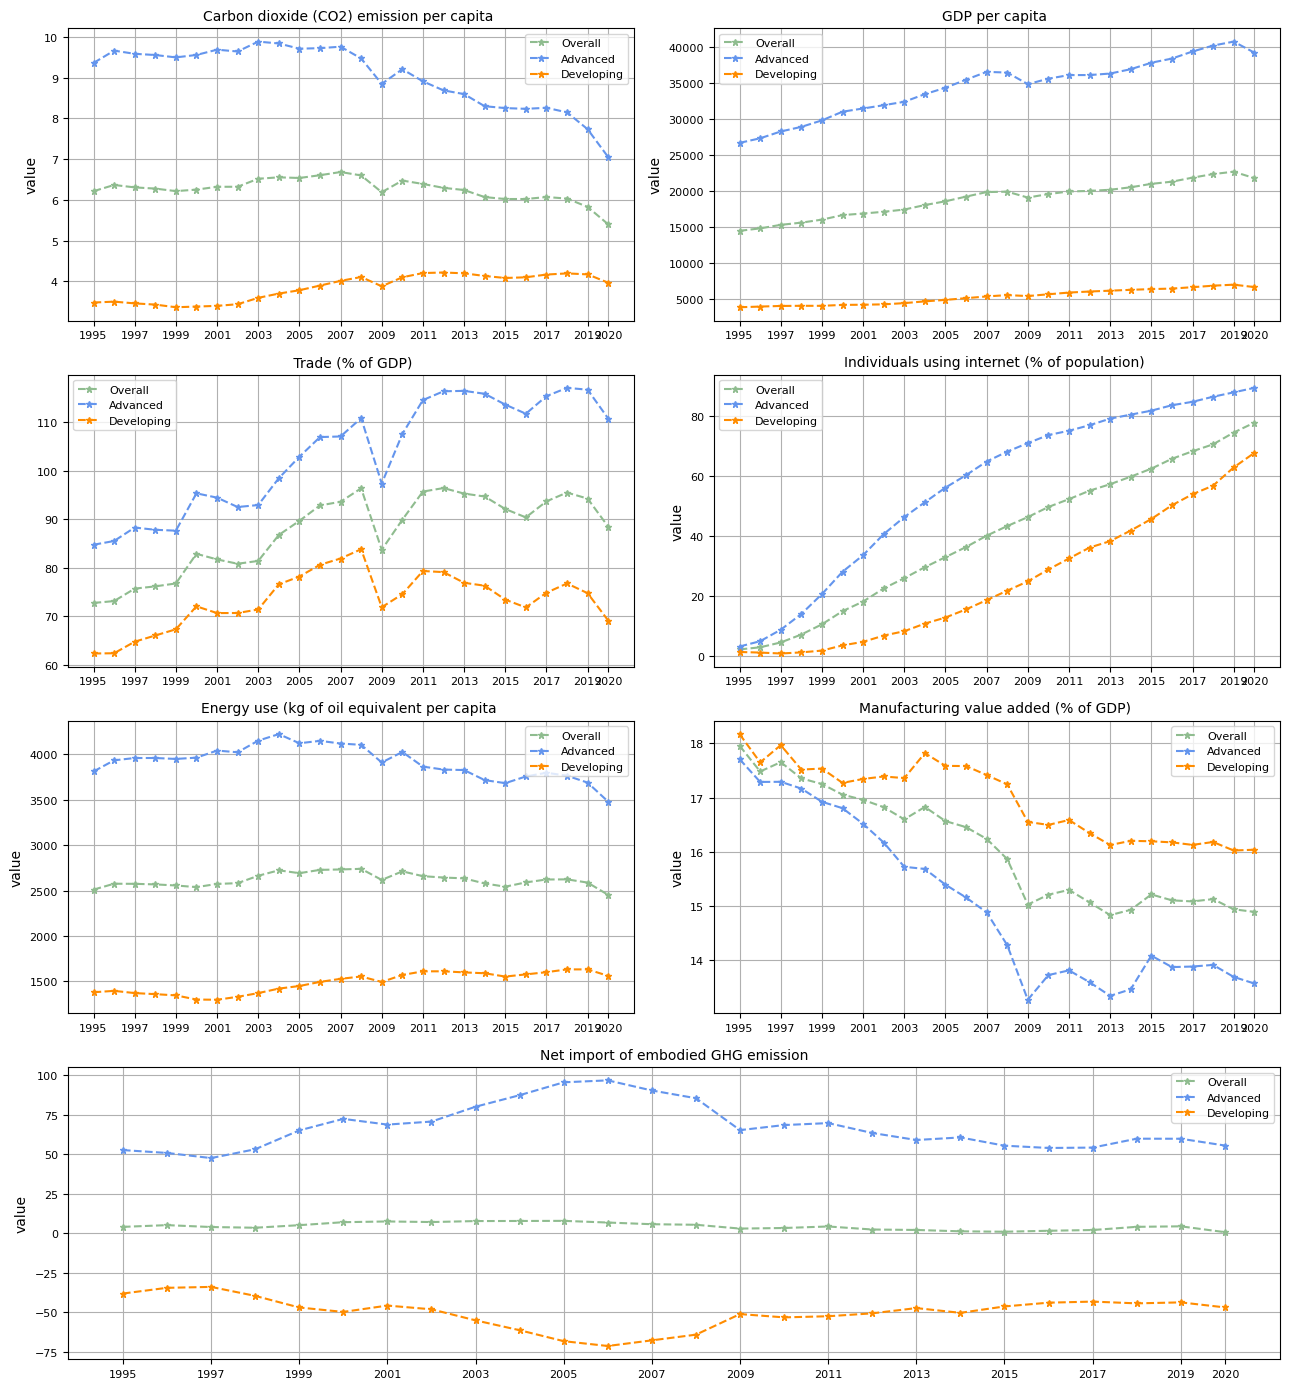

In [743]:
fig = plt.figure(figsize=(13, 14))
gs = gridspec.GridSpec(nrows=4, ncols=2, figure=fig) 

plt.subplots_adjust(wspace=0.17, hspace=0.3) 

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])
ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])
ax30 = fig.add_subplot(gs[3, :]) 


# Plot 1: per capita CO2 emission
ax00.plot(trend["TIME_PERIOD"], trend["co2"], label="co2", marker='*', markersize = 5, linestyle = "dashed", color = 'darkseagreen')
ax00.plot(dev_trend["TIME_PERIOD"], dev_trend["co2"], label="co2", marker='*', markersize = 5, linestyle = "dashed", color = 'cornflowerblue')
ax00.plot(ding_trend["TIME_PERIOD"], ding_trend["co2"], label="co2", marker='*', markersize = 5, linestyle = "dashed", color = 'darkorange')
ax00.set_title("Carbon dioxide (CO2) emission per capita ", fontsize = 10)
ax00.set_ylabel("value", fontsize = 10)
ax00.set_xticks([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020])
ax00.tick_params(axis='x', labelsize = 8)
ax00.tick_params(axis='y', labelsize = 8)
ax00.grid(True)
ax00.legend(['Overall', 'Advanced', 'Developing'], fontsize=8)

# Plot 2: GDP per capita
ax01.plot(trend["TIME_PERIOD"], trend["gdp_pct"], label="gdp_pct (Trend)", marker='*', markersize = 5, linestyle = "dashed", color = 'darkseagreen')
ax01.plot(dev_trend["TIME_PERIOD"], dev_trend["gdp_pct"], label="gdp_pct (Dev)", marker='*', markersize = 5, linestyle = "dashed", color = 'cornflowerblue')
ax01.plot(ding_trend["TIME_PERIOD"], ding_trend["gdp_pct"], label="gdp_pct (Ding)", marker='*', markersize = 5, linestyle = "dashed", color = 'darkorange')
ax01.set_title("GDP per capita ", fontsize = 10)
ax01.set_ylabel("value", fontsize = 10)
ax01.set_xticks([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020])
ax01.tick_params(axis='x', labelsize = 8)
ax01.tick_params(axis='y', labelsize = 8)
ax01.grid(True)
ax01.legend(['Overall', 'Advanced', 'Developing'], fontsize=8)

# Plot 3: Trade Openness 
ax10.plot(trend["TIME_PERIOD"], trend["trade_openness"], label="trade_openness (Trend)", marker='*', markersize = 5, linestyle = "dashed", color = 'darkseagreen')
ax10.plot(dev_trend["TIME_PERIOD"], dev_trend["trade_openness"], label="trade_openness (Dev)", marker='*', markersize = 5, linestyle = "dashed", color = 'cornflowerblue')
ax10.plot(ding_trend["TIME_PERIOD"], ding_trend["trade_openness"], label="trade_openness (Ding)", marker='*', markersize = 5, linestyle = "dashed", color = 'darkorange')
ax10.set_title(" Trade (% of GDP)", fontsize  = 10)
ax01.set_ylabel("value", fontsize = 10)
ax10.set_xticks([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020])
ax10.tick_params(axis='x', labelsize = 8)
ax10.tick_params(axis='y', labelsize = 8)
ax10.grid(True)
ax10.legend(['Overall', 'Advanced', 'Developing'], fontsize=8)

# Plot 4: Internet Penetration
ax11.plot(trend["TIME_PERIOD"], trend["internet"], label="internet", marker='*', markersize = 5, linestyle = "dashed", color = 'darkseagreen')
ax11.plot(dev_trend["TIME_PERIOD"], dev_trend["internet"], label="internet", marker='*', markersize = 5, linestyle = "dashed", color = 'cornflowerblue')
ax11.plot(ding_trend["TIME_PERIOD"], ding_trend["internet"], label="internet", marker='*', markersize = 5, linestyle = "dashed", color = 'darkorange')
ax11.set_title("Individuals using internet (% of population) ", fontsize = 10)
ax11.set_ylabel("value", fontsize = 10)
ax11.set_xticks([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020])
ax11.tick_params(axis='x', labelsize = 8)
ax11.tick_params(axis='y', labelsize = 8)
ax11.grid(True)
ax11.legend(['Overall', 'Advanced', 'Developing'], fontsize=8)

# Plot 5: Energy Intensisty
ax20.plot(trend["TIME_PERIOD"], trend["energy"], label="energy", marker='*', markersize = 5, linestyle = "dashed", color = 'darkseagreen')
ax20.plot(dev_trend["TIME_PERIOD"], dev_trend["energy"], label="energy", marker='*', markersize = 5, linestyle = "dashed", color = 'cornflowerblue')
ax20.plot(ding_trend["TIME_PERIOD"], ding_trend["energy"], label="energy", marker='*', markersize = 5, linestyle = "dashed", color = 'darkorange')
ax20.set_title("Energy use (kg of oil equivalent per capita ", fontsize = 10)
ax20.set_ylabel("value", fontsize = 10)
ax20.set_xticks([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020])
ax20.tick_params(axis='x', labelsize = 8)
ax20.tick_params(axis='y', labelsize = 8)
ax20.grid(True)
ax20.legend(['Overall', 'Advanced', 'Developing'], fontsize=8)

# Plot 6: Manufacturing share of GDP
ax21.plot(trend["TIME_PERIOD"], trend["manufacturing"], label="manufacturing", marker='*', markersize = 5, linestyle = "dashed", color = 'darkseagreen')
ax21.plot(dev_trend["TIME_PERIOD"], dev_trend["manufacturing"], label="manufacturing", marker='*', markersize = 5, linestyle = "dashed", color = 'cornflowerblue')
ax21.plot(ding_trend["TIME_PERIOD"], ding_trend["manufacturing"], label="manufacturing", marker='*', markersize = 5, linestyle = "dashed", color = 'darkorange')
ax21.set_title("Manufacturing value added (% of GDP) ", fontsize = 10)
#axes[0].set_xlabel("Year", fontsize = 7)
ax21.set_ylabel("value", fontsize = 10)
ax21.set_xticks([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020])
ax21.tick_params(axis='x', labelsize = 8)
ax21.tick_params(axis='y', labelsize = 8)
ax21.grid(True)
ax21.legend(['Overall', 'Advanced', 'Developing'], fontsize=8)

# Plot 7: Net import of embodied GHG emission
ax30.plot(trend["TIME_PERIOD"], trend["net_imp"], label="GHG outsourcing (Trend)", marker='*', markersize = 5, linestyle = "dashed", color = 'darkseagreen')
ax30.plot(dev_trend["TIME_PERIOD"], dev_trend["net_imp"], label="GHG outsourcing (Dev)", marker='*', markersize = 5, linestyle = "dashed", color = 'cornflowerblue')
ax30.plot(ding_trend["TIME_PERIOD"], ding_trend["net_imp"], label="GHG outsourcing (Ding)", marker='*', markersize = 5, linestyle = "dashed", color = 'darkorange')
ax30.set_title("Net import of embodied GHG emission", fontsize = 10)
ax30.set_ylabel("value", fontsize = 10)
ax30.set_xticks([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2020])
ax30.tick_params(axis='x', labelsize = 8)
ax30.tick_params(axis='y', labelsize = 8)
ax30.grid(True)
ax30.legend(['Overall', 'Advanced', 'Developing'], fontsize=8)
plt.tight_layout()

#fig.savefig('../plots/Fig1.tiff', format="tiff")

In [5]:
t = pd.read_csv("../data/cleaned/pollution_trade.csv")

In [9]:
a = t[t['development']== 1]

In [38]:
aa = list(a['country'].unique())

In [41]:
len(aa)

33

In [42]:
df1 = pd.DataFrame(aa, columns = ['advanced'])

In [45]:
df1.to_csv("../data/cleaned/advanced_economies.csv", encoding = 'utf-8', index = False)

In [23]:
d = t[t['development']== 0]

In [48]:
bb = list(d['country'].unique())

In [49]:
len(bb)

38

In [50]:
df2 = pd.DataFrame(bb, columns = ['developing'])

In [52]:
df2.to_csv("../data/cleaned/developing_economies.csv", encoding = 'utf-8', index = False)